<a href="https://colab.research.google.com/github/KubasovMK/ML_course/blob/main/Random_Forest_Task_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn import datasets


import pandas as pd
dataset=pd.read_csv('/content/music_prepared.csv')

In [ ]:
dataset

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,77,230613,False,0.509,0.448,4,-7.552,0,0.0357,0.007130,0.013700,0.2440,0.2210,156.909,3,0.0
1,79,208760,False,0.636,0.676,2,-3.442,1,0.0263,0.080700,0.000000,0.0831,0.2730,113.980,4,0.0
2,76,180690,False,0.573,0.539,2,-6.091,0,0.0322,0.016200,0.000012,0.1050,0.3900,75.012,4,0.0
3,84,232106,False,0.743,0.446,4,-7.807,0,0.0683,0.003900,0.118000,0.3370,0.2780,123.596,4,0.0
4,76,225026,False,0.572,0.214,7,-15.625,1,0.0293,0.649000,0.129000,0.1250,0.4850,95.542,4,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,25,355311,False,0.323,0.997,7,-2.245,1,0.4580,0.012500,0.000004,0.1240,0.1600,176.044,4,4.0
4996,26,494259,False,0.307,0.850,2,-6.056,1,0.1050,0.000677,0.000012,0.7730,0.3860,160.084,4,4.0
4997,26,186786,False,0.545,0.311,0,-12.695,0,0.0303,0.610000,0.000005,0.3850,0.0646,105.063,4,4.0
4998,27,237813,False,0.413,0.688,2,-8.694,1,0.0350,0.021500,0.000201,0.9730,0.2690,104.566,4,4.0


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(dataset.drop('popularity', axis=1), dataset.popularity, test_size=0.2, random_state=1)

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
from sklearn.metrics import root_mean_squared_error


reg_tree = DecisionTreeRegressor(max_depth=1, random_state=1)
reg_tree.fit(X_train, y_train)

y_test_pred = reg_tree.predict(X_test)

{
'MAE': mean_absolute_error(y_test, y_test_pred),
'MAPE': mean_absolute_percentage_error(y_test, y_test_pred),
'RMSE': root_mean_squared_error(y_test, y_test_pred)
}

RMSE_tree = root_mean_squared_error(y_test, y_test_pred)
print(RMSE_tree)

28.55332049505038


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import GridSearchCV


tree = DecisionTreeRegressor(random_state=1)

reg = GridSearchCV(tree, {'max_depth': range(1, 50, 3)})
tree.fit(X_train, y_train)

y_test_pred = tree.predict(X_test)

'RMSE', root_mean_squared_error(y_test, y_test_pred)

RMSE_forest = root_mean_squared_error(y_test, y_test_pred)
print(RMSE_forest)

29.98964247528726


In [ ]:
print(round(abs(RMSE_forest - RMSE_tree), 2))

1.44


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Загрузка данных
data = pd.read_csv('/content/music_prepared.csv')

# Разделение на признаки и целевую переменную
X = data.drop('popularity', axis=1)
y = data['popularity']

# Разбиение на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
# Дерево решений
dt = DecisionTreeRegressor(random_state=1)
dt.fit(X_train, y_train)

# Предсказания и RMSE
dt_train_pred = dt.predict(X_train)
dt_test_pred = dt.predict(X_test)

dt_train_rmse = np.sqrt(mean_squared_error(y_train, dt_train_pred))
dt_test_rmse = np.sqrt(mean_squared_error(y_test, dt_test_pred))

In [ ]:
# Случайный лес
rf = RandomForestRegressor(random_state=1)
rf.fit(X_train, y_train)

# Предсказания и RMSE
rf_train_pred = rf.predict(X_train)
rf_test_pred = rf.predict(X_test)

rf_train_rmse = np.sqrt(mean_squared_error(y_train, rf_train_pred))
rf_test_rmse = np.sqrt(mean_squared_error(y_test, rf_test_pred))

In [ ]:
improvement = dt_test_rmse - rf_test_rmse
improvement_rounded = round(improvement, 2)
improvement_rounded

np.float64(7.21)

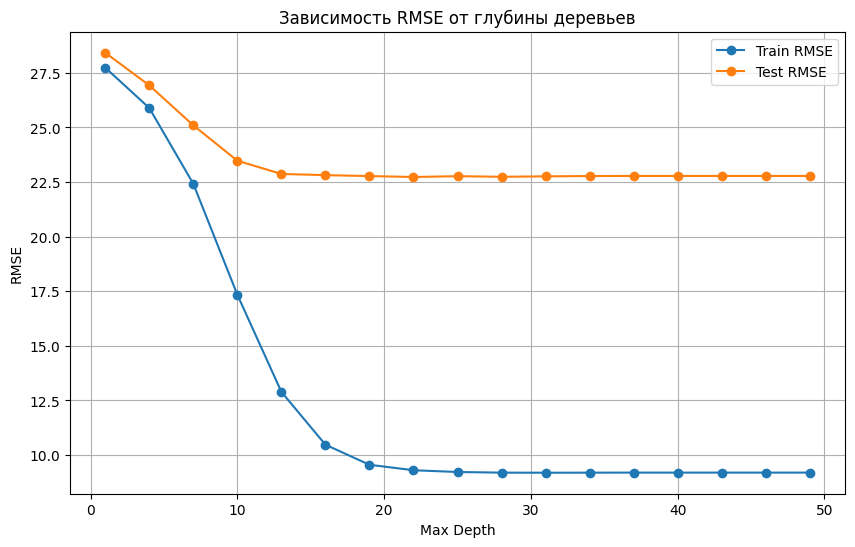

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Загрузка данных
data = pd.read_csv('/content/music_prepared.csv')
X = data.drop('popularity', axis=1)
y = data['popularity']

# Разделение данных
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Диапазон глубин для исследования
depths = range(1, 51, 3)
train_rmse = []
test_rmse = []

# Обучение моделей с разной глубиной
for depth in depths:
    model = RandomForestRegressor(
        max_depth=depth,
        random_state=1,
        n_estimators=100  # Фиксируем количество деревьев
    )
    model.fit(X_train, y_train)

    # Предсказания и вычисление RMSE
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)

    train_rmse.append(np.sqrt(mean_squared_error(y_train, train_pred)))
    test_rmse.append(np.sqrt(mean_squared_error(y_test, test_pred)))

# Визуализация
plt.figure(figsize=(10, 6))
plt.plot(depths, train_rmse, label='Train RMSE', marker='o')
plt.plot(depths, test_rmse, label='Test RMSE', marker='o')
plt.xlabel('Max Depth')
plt.ylabel('RMSE')
plt.title('Зависимость RMSE от глубины деревьев')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
print(test_rmse[0])

28.423178535774095


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Загрузка данных
data = pd.read_csv('/content/music_prepared.csv')

# Преобразование целевой переменной в бинарный вид
data['popularity_binary'] = (data['popularity'] > 50).astype(int)

# Разделение на признаки и целевую переменную
X = data.drop(['popularity', 'popularity_binary'], axis=1)
y = data['popularity_binary']

# Разбиение на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

## Дерево решений
dt = DecisionTreeClassifier(max_depth=17, random_state=1)
dt.fit(X_train, y_train)

# Accuracy для дерева решений
dt_train_acc = accuracy_score(y_train, dt.predict(X_train))
dt_test_acc = accuracy_score(y_test, dt.predict(X_test))

## Случайный лес
rf = RandomForestClassifier(random_state=1)
rf.fit(X_train, y_train)

# Accuracy для случайного леса
rf_train_acc = accuracy_score(y_train, rf.predict(X_train))
rf_test_acc = accuracy_score(y_test, rf.predict(X_test))

# Разница в accuracy на тестовой выборке
improvement = rf_test_acc - dt_test_acc
improvement_rounded = round(improvement, 2)
print(improvement_rounded)

0.08


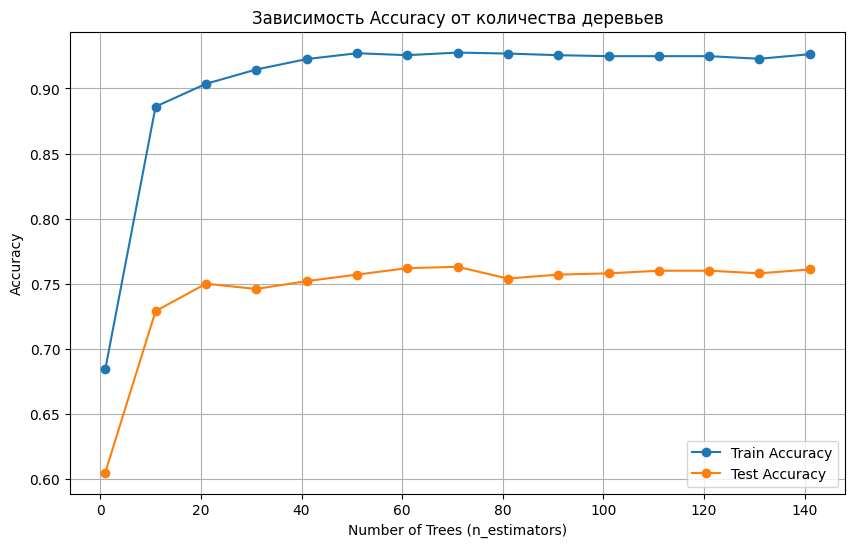

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Загрузка данных и подготовка
data = pd.read_csv('/content/music_prepared.csv')
data['popularity_binary'] = (data['popularity'] > 50).astype(int)
X = data.drop(['popularity', 'popularity_binary'], axis=1)
y = data['popularity_binary']

# Разделение данных
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Диапазон количества деревьев
n_trees = range(1, 151, 10)
train_acc = []
test_acc = []

# Обучение с разным количеством деревьев
for n in n_trees:
    model = RandomForestClassifier(
        n_estimators=n,
        random_state=1,
        max_depth=10  # Фиксируем глубину для чистоты эксперимента
    )
    model.fit(X_train, y_train)

    train_acc.append(accuracy_score(y_train, model.predict(X_train)))
    test_acc.append(accuracy_score(y_test, model.predict(X_test)))

# Визуализация
plt.figure(figsize=(10, 6))
plt.plot(n_trees, train_acc, label='Train Accuracy', marker='o')
plt.plot(n_trees, test_acc, label='Test Accuracy', marker='o')
plt.xlabel('Number of Trees (n_estimators)')
plt.ylabel('Accuracy')
plt.title('Зависимость Accuracy от количества деревьев')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Загрузка данных
data = pd.read_csv('/content/music_prepared.csv')
data['popularity_binary'] = (data['popularity'] > 50).astype(int)
X = data.drop(['popularity', 'popularity_binary'], axis=1)
y = data['popularity_binary']

# Разделение данных
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Параметры леса
n_trees = 100
n_samples = X_train.shape[0] // 2  # Половина объектов
n_features = X_train.shape[1] // 2  # Половина признаков

# Создаем список для хранения деревьев
trees = []

# Построение 100 деревьев
for _ in range(n_trees):
    # Создаем подвыборку объектов (бутстрэп)
    sample_idx = np.random.choice(X_train.index, size=n_samples, replace=True)
    X_sample = X_train.loc[sample_idx]
    y_sample = y_train.loc[sample_idx]

    # Выбираем случайные признаки
    feature_idx = np.random.choice(X_train.columns, size=n_features, replace=False)
    X_sample = X_sample[feature_idx]

    # Строим дерево
    tree = DecisionTreeClassifier(random_state=1)
    tree.fit(X_sample, y_sample)
    trees.append(tree)

# Получаем глубину первого дерева
first_tree_depth = trees[0].get_depth()
print(f"Глубина первого дерева: {first_tree_depth}")

Глубина первого дерева: 28


In [ ]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Загрузка данных
data = pd.read_csv('/content/music_prepared.csv')
data['popularity_binary'] = (data['popularity'] > 50).astype(int)
X = data.drop(['popularity', 'popularity_binary'], axis=1)
y = data['popularity_binary']

# Разделение данных
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Параметры леса
n_trees = 100
n_samples = X_train.shape[0] // 2
n_features = X_train.shape[1] // 2

# Создаем случайный лес
forest = []
for _ in range(n_trees):
    # Бутстрэп подвыборка
    sample_idx = np.random.choice(X_train.index, size=n_samples, replace=True)
    X_sample = X_train.loc[sample_idx]
    y_sample = y_train.loc[sample_idx]

    # Случайные признаки
    feature_idx = np.random.choice(X_train.columns, size=n_features, replace=False)
    X_sample = X_sample[feature_idx]

    # Обучение дерева
    tree = DecisionTreeClassifier(random_state=1)
    tree.fit(X_sample, y_sample)
    forest.append((tree, feature_idx))  # Сохраняем дерево и использованные признаки

# Получаем предсказания всех деревьев
predictions = []
for tree, features in forest:
    # Важно: использовать только те признаки, которые использовались при обучении дерева
    pred = tree.predict(X_test[features])
    predictions.append(pred)

# Транспонируем список предсказаний
predictions_per_object = list(zip(*predictions))

# Голосование большинством
voted_predictions = []
for obj_preds in predictions_per_object:
    # Выбираем класс с наибольшим количеством голосов
    voted = max(set(obj_preds), key=obj_preds.count)
    voted_predictions.append(voted)

# Вычисляем accuracy
accuracy = accuracy_score(y_test, voted_predictions)
rounded_accuracy = round(accuracy, 2)

print(f"Accuracy: {rounded_accuracy}")

Accuracy: 0.76
